In [ ]:
# Here we implement a clustring model using K-means to cluster customers of an ecommerce website

In [46]:
library(caret)
library(factoextra)
library(ggplot2)
library(GGally)
library(plotly)

In [3]:
# 1.) Data Extraction

In [4]:
df = read.csv("C:\\Users\\hp\\Downloads\\french-C2C-ecommerce-store\\6M-0K-99K.users.dataset.public.csv")

In [5]:
head(df)

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,⋯,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>
1,-1.097895e+18,user,Royaume-Uni,en,147,10,77,26,174,74,⋯,mr,True,False,True,True,11,3196,106.53,8.88,gb
2,2.347567e+18,user,Monaco,en,167,8,2,19,170,99,⋯,mrs,True,False,True,True,12,3204,106.80,8.90,mc
3,6.870941e+18,user,France,fr,137,13,60,33,163,94,⋯,mrs,True,False,True,False,11,3203,106.77,8.90,fr
4,-4.640273e+18,user,Etats-Unis,en,131,10,14,122,152,92,⋯,mrs,True,False,True,False,12,3198,106.60,8.88,us
5,-5.175831e+18,user,Etats-Unis,en,167,8,0,25,125,100,⋯,mrs,False,False,False,True,22,2854,95.13,7.93,us
6,7.631788e+18,user,Allemagne,de,130,12,1,47,123,91,⋯,mrs,True,False,True,False,11,3196,106.53,8.88,de


In [6]:
summary(df)

 identifierHash           type             country            language        
 Min.   :-9.223e+18   Length:98913       Length:98913       Length:98913      
 1st Qu.:-4.623e+18   Class :character   Class :character   Class :character  
 Median :-1.338e+15   Mode  :character   Mode  :character   Mode  :character  
 Mean   :-6.692e+15                                                           
 3rd Qu.: 4.616e+18                                                           
 Max.   : 9.223e+18                                                           
 socialNbFollowers socialNbFollows     socialProductsLiked productsListed    
 Min.   :  3.000   Min.   :    0.000   Min.   :    0.00    Min.   :  0.0000  
 1st Qu.:  3.000   1st Qu.:    8.000   1st Qu.:    0.00    1st Qu.:  0.0000  
 Median :  3.000   Median :    8.000   Median :    0.00    Median :  0.0000  
 Mean   :  3.432   Mean   :    8.426   Mean   :    4.42    Mean   :  0.0933  
 3rd Qu.:  3.000   3rd Qu.:    8.000   3rd Qu.:    0.00  

In [7]:
str(df)

'data.frame':	98913 obs. of  24 variables:
 $ identifierHash     : num  -1.10e+18 2.35e+18 6.87e+18 -4.64e+18 -5.18e+18 ...
 $ type               : chr  "user" "user" "user" "user" ...
 $ country            : chr  "Royaume-Uni" "Monaco" "France" "Etats-Unis" ...
 $ language           : chr  "en" "en" "fr" "en" ...
 $ socialNbFollowers  : int  147 167 137 131 167 130 121 53 744 57 ...
 $ socialNbFollows    : int  10 8 13 10 8 12 0 9 13764 8 ...
 $ socialProductsLiked: int  77 2 60 14 0 1 1140 3 51671 45 ...
 $ productsListed     : int  26 19 33 122 25 47 31 5 0 123 ...
 $ productsSold       : int  174 170 163 152 125 123 108 106 104 92 ...
 $ productsPassRate   : num  74 99 94 92 100 91 94 98 85 74 ...
 $ productsWished     : int  104 0 10 7 0 0 531 0 1842 6 ...
 $ productsBought     : int  1 0 3 0 0 0 105 0 0 2 ...
 $ gender             : chr  "M" "F" "F" "F" ...
 $ civilityGenderId   : int  1 2 2 2 2 2 3 2 2 3 ...
 $ civilityTitle      : chr  "mr" "mrs" "mrs" "mrs" ...
 $ hasAnyApp   

In [8]:
summary(df$seniorityAsYears)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7.92    7.94    8.88    8.51    8.89    8.90 

In [9]:
# The columns which provide same information, basically duplicate columns, and doesnt provide any solid information for 
# clustering will be dropped

In [10]:
df = subset(df, select = -c(identifierHash, type, country, civilityGenderId, civilityTitle, hasAndroidApp, hasIosApp,
                           seniorityAsMonths, seniorityAsYears, seniority))

In [11]:
head(df)

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,hasAnyApp,hasProfilePicture,daysSinceLastLogin,countryCode
,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>
1,en,147,10,77,26,174,74,104,1,M,True,True,11,gb
2,en,167,8,2,19,170,99,0,0,F,True,True,12,mc
3,fr,137,13,60,33,163,94,10,3,F,True,False,11,fr
4,en,131,10,14,122,152,92,7,0,F,True,False,12,us
5,en,167,8,0,25,125,100,0,0,F,False,True,22,us
6,de,130,12,1,47,123,91,0,0,F,True,False,11,de


In [12]:
# 2.) Data Preprocessing

In [13]:
# Further we check for missing values and there are none.

In [14]:
summary(df)

   language         socialNbFollowers socialNbFollows     socialProductsLiked
 Length:98913       Min.   :  3.000   Min.   :    0.000   Min.   :    0.00   
 Class :character   1st Qu.:  3.000   1st Qu.:    8.000   1st Qu.:    0.00   
 Mode  :character   Median :  3.000   Median :    8.000   Median :    0.00   
                    Mean   :  3.432   Mean   :    8.426   Mean   :    4.42   
                    3rd Qu.:  3.000   3rd Qu.:    8.000   3rd Qu.:    0.00   
                    Max.   :744.000   Max.   :13764.000   Max.   :51671.00   
 productsListed      productsSold      productsPassRate   productsWished    
 Min.   :  0.0000   Min.   :  0.0000   Min.   :  0.0000   Min.   :   0.000  
 1st Qu.:  0.0000   1st Qu.:  0.0000   1st Qu.:  0.0000   1st Qu.:   0.000  
 Median :  0.0000   Median :  0.0000   Median :  0.0000   Median :   0.000  
 Mean   :  0.0933   Mean   :  0.1216   Mean   :  0.8123   Mean   :   1.563  
 3rd Qu.:  0.0000   3rd Qu.:  0.0000   3rd Qu.:  0.0000   3rd Qu.:   

In [15]:
# As few columns have categorical values, we further encode them to appropriate quantitative values.

In [16]:
str(df$language)

 chr [1:98913] "en" "en" "fr" "en" "en" "de" "en" "fr" "it" "en" "it" "en" ...


In [17]:
str(df$gender)

 chr [1:98913] "M" "F" "F" "F" "F" "F" "F" "F" "F" "F" "M" "F" "F" "M" "F" ...


In [18]:
str(df$hasAnyApp)

 chr [1:98913] "True" "True" "True" "True" "False" "True" "True" "True" ...


In [19]:
str(df$hasProfilePicture)

 chr [1:98913] "True" "True" "False" "False" "True" "False" "False" "True" ...


In [20]:
str(df$countryCode)

 chr [1:98913] "gb" "mc" "fr" "us" "us" "de" "se" "fr" "it" "gb" "it" "us" ...


In [21]:
df$language = ifelse(df$language == "en", 1, 0)

In [22]:
df$gender = ifelse(df$gender == "M", 1, 0)

In [23]:
df$hasAnyApp = ifelse(df$hasAnyApp == "True", 1, 0)

In [24]:
df$hasProfilePicture = ifelse(df$hasProfilePicture == "True",1,0)

In [25]:
encode_ordinal <- function(x, order = unique(x)) {
  x <- as.numeric(factor(x, levels = order, exclude = NULL))
  x
}

In [26]:
df$countryCode = encode_ordinal(df$countryCode)

In [27]:
summary(df)

    language      socialNbFollowers socialNbFollows     socialProductsLiked
 Min.   :0.0000   Min.   :  3.000   Min.   :    0.000   Min.   :    0.00   
 1st Qu.:0.0000   1st Qu.:  3.000   1st Qu.:    8.000   1st Qu.:    0.00   
 Median :1.0000   Median :  3.000   Median :    8.000   Median :    0.00   
 Mean   :0.5213   Mean   :  3.432   Mean   :    8.426   Mean   :    4.42   
 3rd Qu.:1.0000   3rd Qu.:  3.000   3rd Qu.:    8.000   3rd Qu.:    0.00   
 Max.   :1.0000   Max.   :744.000   Max.   :13764.000   Max.   :51671.00   
 productsListed      productsSold      productsPassRate   productsWished    
 Min.   :  0.0000   Min.   :  0.0000   Min.   :  0.0000   Min.   :   0.000  
 1st Qu.:  0.0000   1st Qu.:  0.0000   1st Qu.:  0.0000   1st Qu.:   0.000  
 Median :  0.0000   Median :  0.0000   Median :  0.0000   Median :   0.000  
 Mean   :  0.0933   Mean   :  0.1216   Mean   :  0.8123   Mean   :   1.563  
 3rd Qu.:  0.0000   3rd Qu.:  0.0000   3rd Qu.:  0.0000   3rd Qu.:   0.000  
 Max. 

In [28]:
# 3.) Data redundancy removal and transformation

In [29]:
# To reduce the skewness of the data we perform cube root transformation on the data

In [30]:
cube_df = (df)^(1/3)

In [31]:
# As we are using K-means with is default Euclidean distance method, which concludes the optimum clusters where the intra-cluster
# sum of squares is minimized which can be derived by minimizing the variance in the data points before-hand.
# thus we rescale the data with mean 0 and sd 1, using z-score normalization

In [32]:
scaled_df <- as.data.frame(scale(cube_df))[1:20000,]

In [33]:
scaled_df

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,hasAnyApp,hasProfilePicture,daysSinceLastLogin,countryCode
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.9582524,23.11553,1.0521332,4.4984375,14.3679671,24.12968,9.764106,7.4068850,3.0509327,1.8275061,1.667042,0.1397579,-3.5731570,-1.16512944
2,0.9582524,24.51253,-0.0526968,1.0878556,12.9295995,23.94233,10.768793,-0.2656252,-0.2246298,-0.5471883,1.667042,0.1397579,-3.5331849,-0.80784477
3,-1.0435559,22.36907,2.4607612,4.1118048,15.5664090,23.60727,10.582693,3.2493831,4.4995489,-0.5471883,1.667042,-7.1551601,-3.5731570,-0.55721796
4,0.9582524,21.90359,1.0521332,2.3979424,24.1358448,23.06079,10.506404,2.8553648,-0.2246298,-0.5471883,1.667042,-7.1551601,-3.5331849,-0.35769430
5,0.9582524,24.51253,-0.0526968,-0.3471779,14.1797759,21.59715,10.805257,-0.2656252,-0.2246298,-0.5471883,-0.599859,0.1397579,-3.2201122,-0.35769430
6,-1.0435559,21.82464,2.0178825,0.7918089,17.5290611,21.48064,10.467845,-0.2656252,-0.2246298,-0.5471883,1.667042,-7.1551601,-3.5731570,-0.18920417
7,0.9582524,21.09515,-14.3607516,11.5511789,15.2428622,20.56376,10.582693,12.9460493,15.2284719,-0.5471883,1.667042,-7.1551601,-3.5731570,-0.04192430
8,-1.0435559,13.84466,0.5202251,1.2955254,8.2420967,20.43521,10.732083,-0.2656252,-0.2246298,-0.5471883,1.667042,0.1397579,-3.5731570,-0.55721796
9,-1.0435559,46.17274,157.0871422,42.0757846,-0.1211151,20.30504,10.230345,19.7340481,-0.2246298,-0.5471883,1.667042,-7.1551601,-3.4594600,0.08977591


In [34]:
# 4.) Data Mining

In [35]:
# Now we apply k-means on the data and create our baseline model, with k-value of 3

In [36]:
set.seed(123)
km.res <- kmeans(scaled_df, 3, nstart = 25)

In [37]:
summary(km.res)

             Length Class  Mode   
cluster      20000  -none- numeric
centers         42  -none- numeric
totss            1  -none- numeric
withinss         3  -none- numeric
tot.withinss     1  -none- numeric
betweenss        1  -none- numeric
size             3  -none- numeric
iter             1  -none- numeric
ifault           1  -none- numeric

In [38]:
# here we use elbow mthod to find the optimum number of clusters

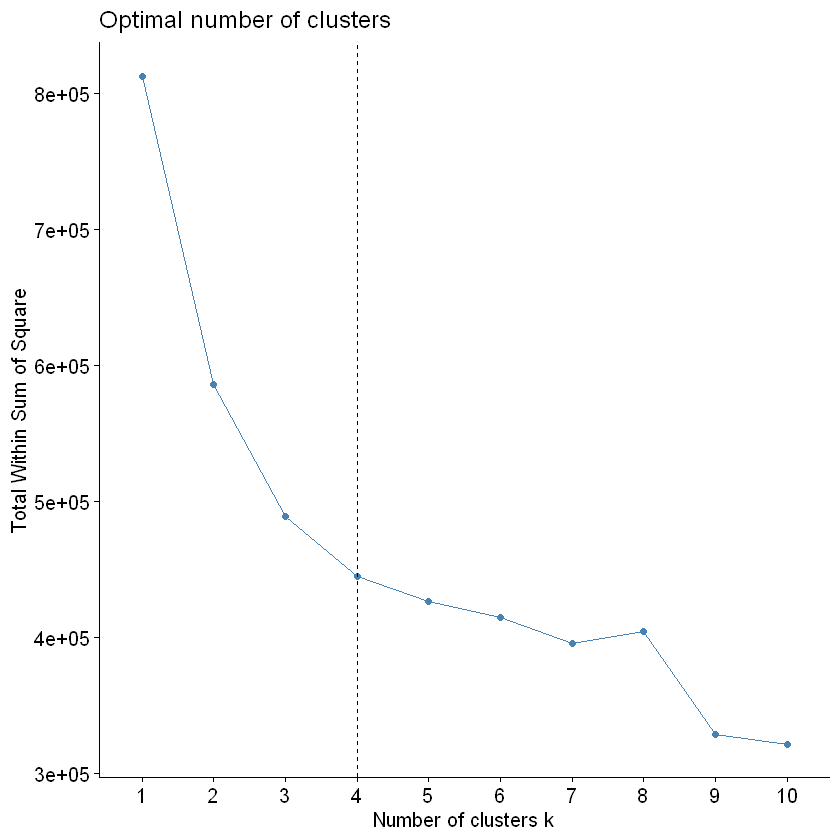

In [39]:
fviz_nbclust(scaled_df, kmeans, method = "wss") + geom_vline(xintercept = 4, linetype = 2)

In [40]:
# As per the elbow plot, 4 is the ideal number of clusters, thus we fine-tune the model using k = 4

In [41]:
km.res <- kmeans(scaled_df, 4, nstart = 25)

In [42]:
summary(km.res)

             Length Class  Mode   
cluster      20000  -none- numeric
centers         56  -none- numeric
totss            1  -none- numeric
withinss         4  -none- numeric
tot.withinss     1  -none- numeric
betweenss        1  -none- numeric
size             4  -none- numeric
iter             1  -none- numeric
ifault           1  -none- numeric

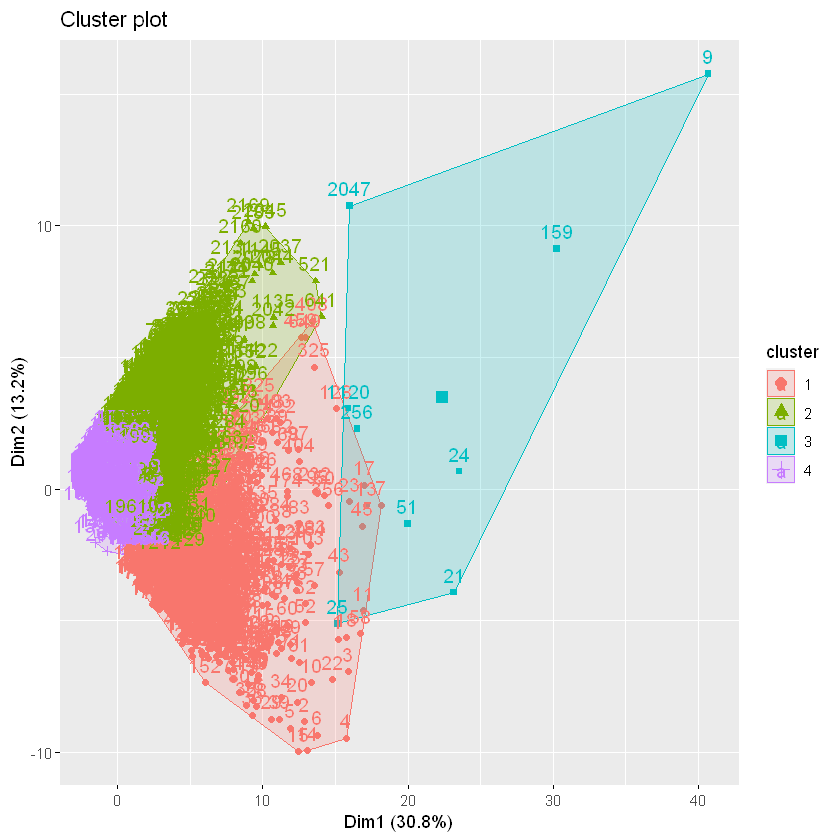

In [43]:
fviz_cluster(km.res, data = scaled_df)

In [45]:
print(km.res)

K-means clustering with 4 clusters of sizes 935, 2850, 9, 16206

Cluster means:
     language socialNbFollowers socialNbFollows socialProductsLiked
1 -0.26424227         5.0405833      0.84737777          1.82907485
2  0.04444449         2.4347777      0.72541572          2.88197457
3 -0.37628644        23.9251585     73.63153409         14.68089106
4 -0.01992356         0.5179435     -0.01315946         -0.04285474
  productsListed productsSold productsPassRate productsWished productsBought
1    6.282605630   8.28970172      10.12111173     1.38579470     1.52784401
2    0.776681877   0.62193976      -0.09732396     2.76773110     2.70633574
3   13.147040633  12.42081118       7.94348557     9.84911829     1.89087222
4    0.002601364   0.04459249      -0.09732396    -0.08018895     0.02971809
       gender  hasAnyApp hasProfilePicture daysSinceLastLogin   countryCode
1 -0.01637424 0.97848564        -2.7782093        -2.67609765 -0.1803665110
2 -0.06974972 0.94401956        -2.4659356 

In [ ]:
# Thus the model is moderately poor fit with (between_SS/total_SS) of 46.14